**Problem statement:**
 - Implement a linear regression model to predict the prices of houses
based on their square footage and the number of bedrooms and
bathrooms.

- The lifecycle in any datascience project or rather it's workflow:
  1. Data Analysis/Preprocessing
  2. Feature Engineering
  3. Feature Selection
  4. Model Building
  5. Model Deployment

- We can use techniques like feature engineering to create new features from existing ones, such as the total square of all floors or total number of bathrooms in the house to bathrooms.
- We can also use techniques like cross-validation to evaluate the performance of our model and ensure that it generalizes well to new data.
- Finally, we can use techniques like regularization to prevent overfitting and improve the model's performance on the test set.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#maximum number of columns to use
pd.pandas.set_option('display.max_columns', None)   
#Load the data
import os
path="c:\\Users\\ADMIN"
training_data=os.path.join(path,"AppData\\Local\\Temp\\Rar$DRa13476.19479\\train.csv")
test_data=os.path.join(path,"AppData\\Local\\Temp\\Rar$DRa13476.23092\\test.csv")
training_data=pd.read_csv(training_data,na_values=['NA', 'N/A','NAN','NaN'], keep_default_na=True)
training_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

- Goals of this project:
  - Perform regression 
  - 

## Exploratory Data Analysis

In [3]:
#check shape of the data
training_data.shape  #-we have 1460 rows and 81 columns!!!!

(1460, 81)

In [4]:
#get information of the data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#dtypes....clearly
dtypes={}
for i in training_data.columns:
    dtypes[i]=training_data[i].dtype
print(dtypes)    
    #from output and by cross checking using the data_description.txt file the data types are quite okay
    #Just on thing it is way better and efficient to use type category istead of object type as for each object type column
    #there are no popen text bt rather categories for each we can then convert

   

{'Id': dtype('int64'), 'MSSubClass': dtype('int64'), 'MSZoning': dtype('O'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('int64'), 'Street': dtype('O'), 'Alley': dtype('O'), 'LotShape': dtype('O'), 'LandContour': dtype('O'), 'Utilities': dtype('O'), 'LotConfig': dtype('O'), 'LandSlope': dtype('O'), 'Neighborhood': dtype('O'), 'Condition1': dtype('O'), 'Condition2': dtype('O'), 'BldgType': dtype('O'), 'HouseStyle': dtype('O'), 'OverallQual': dtype('int64'), 'OverallCond': dtype('int64'), 'YearBuilt': dtype('int64'), 'YearRemodAdd': dtype('int64'), 'RoofStyle': dtype('O'), 'RoofMatl': dtype('O'), 'Exterior1st': dtype('O'), 'Exterior2nd': dtype('O'), 'MasVnrType': dtype('O'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('O'), 'ExterCond': dtype('O'), 'Foundation': dtype('O'), 'BsmtQual': dtype('O'), 'BsmtCond': dtype('O'), 'BsmtExposure': dtype('O'), 'BsmtFinType1': dtype('O'), 'BsmtFinSF1': dtype('int64'), 'BsmtFinType2': dtype('O'), 'BsmtFinSF2': dtype('int64'), 'BsmtUnfSF':

**Function to convert to Categorical Datatype**
- Advantages of using categorical datatype:
    - Allows for creation of ordered data where applicable
    - Saves on memory usage
    

In [6]:
#filtering of the categorical columns and numerical-columns
categorical_columns=training_data.select_dtypes(include=['object']).columns
numerical_columns=training_data.select_dtypes(exclude=['object']).columns

In [7]:
print(len(categorical_columns))
print("Categorical columns:\n", categorical_columns)

print(len(numerical_columns))
print("Numerical columns:\n",numerical_columns)

#out of 81 columns we have 43 categorical columns
#out of 81 columns we have 38 numerical columns


43
Categorical columns:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
38
Numerical columns:
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',

In [8]:
ordered_categorical={
    "LotShape":['Reg','IR1','IR2','IR3'],
    "LandContour":[' Lvl',' Bnk','HLS','Low'],
    "Utilities":['ELO','NoSeWa','NoSewr','AllPub'],
    "LandSlope":['Gtl','Mod','Sev'],
    "BldgType":['1Fam','2FmCon','Duplx','TwnhsE','TwnhsI'],
    "ExterQual":['Po','Fa','TA','Gd','Ex'],
    "ExterCond":['Po','Fa','TA','Gd','Ex'],
    "BsmtQual":['None','Po','Fa','TA','Gd','Ex'],
    "BsmtCond":['None','Po','Fa','TA','Gd','Ex'],
    "BsmtExposure":['None','No','Mn','Av','Gd'],
    "BsmtFinType1":['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    "BsmtFinType2":['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    "HeatingQC":['Po','Fa','TA','Gd','Ex'],
    "CentralAir":['N','Y'],
    "Electrical":['Mix','FuseP','FuseF','FuseA','SBrkr'],
    "KitchenQual":['Po','Fa','TA','Gd','Ex'],
    "Functional":['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
    "FireplaceQu":['None','Po','Fa','TA','Gd','Ex'],
    "GarageType":['NA','Detchd','CarPort','BuiltIn','Basment','Attchd','2Types'],
    "GarageFinish":['None','Unf','RFn','Fin'],
    "GarageQual":['None','Po','Fa','TA','Gd','Ex'],
    "GarageCond":['None','Po','Fa','TA','Gd','Ex'],
    "PavedDrive":['N','P','Y'],
    "PoolQC":['None','Fa','TA','Gd','Ex'],
    "Fence":['None','MnWw','GdWo','MnPrv','GdPrv'],
    "MiscFeature":['None','TenC','Shed','Othr','Gar2','Elev'],
    "SaleType":['Oth','ConLD','ConLI','ConLw','Con','COD','New','VWD','CWD','WD',],
    "SaleCondition":['Partial','Family','Alloca','AdjLand','Abnorml','Normal']
  }

nominal_categorical=['MSZoning','Street','Alley','LotConfig','Neighborhood','Condition1','Condition2',"HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating",]

#total
print("Ordered categories",len(ordered_categorical))
print("Nominal categories",len(nominal_categorical))
print("Total categories", len(ordered_categorical)+len(nominal_categorical))

Ordered categories 28
Nominal categories 15
Total categories 43


In [9]:
#function to carry out the conversion
def convert_categorical(df:pd.DataFrame,list1:str,list2:2)->pd.DataFrame:
    """
    This function takes in a dataframe and using some previously defined lists
    it converts object dtype columns to categorical dtype columns cosidering either class ordinal categories
    or nominal categories
    
    params:
      df:pd.DataFrame
        the dataframe having the columns whose dtype should be changed
      list1:str
        the name of the column whose dtype should be changed to ordinal categorical data
      list2:2
        the name of the column whose dtype should be changed to nominal categorical data
    returns:
      pd.DataFrame
    """

    for i in df.columns:
        if i in list1.keys():
            df[i]=pd.Categorical(df[i],categories=list1[i],ordered=True)
            if 'None' in list1[i]:
                df[i]=df[i].fillna("None")#caters for the missing values
        elif i in list2:
            df[i]=df[i].fillna("None")#caters for the missing values
            df[i]=pd.Categorical(df[i] ,ordered=False)#by not specifying the categories using the categories parameter the function infers directly from the data
           
    return df

training_data=convert_categorical(training_data,ordered_categorical,nominal_categorical)  

#check for memory use change
training_data.info()

#As stated above,the memory usage has decreased to 506.1 KB from 924.0+ KB
#also the various datatypes in this data are category(43),int(35) and float(3).Thus it is evident that our function has successfully converted dtype object to category


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    86 non-null     category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1334 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

_Checking for missing values_

In [ ]:
missing_num=training_data.columns[training_data.isnull().sum() != 0]
to_add=[]
for i in training_data.columns:
 for j in training_data[i]:
    if j == "None":
        to_add.append(i)
        break
    
print(to_add) 

to_add=[x for x in to_add if len(training_data[training_data[x]==None])]
# missing_num += ([x for x in training_data.columns if "None" in training_data[x]])

# print(("Columns with missing values are ",len(missing_num)),"\n")
# no_missing=training_data.columns[training_data.isnull().sum() == 0]
# #print(("Columns with zero missing values are ",len(no_missing)))
# for i in missing_num:
#     print(i,":",training_data[i].isnull().sum())

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
uhjk

- The next step is feature inspection which let's describe it as a way of validating their purpose and their truthfulness .
- It's basically validating their use in the dataset

In [ ]:
#MasVnrType  and MasVnrArea
print(len(training_data.loc[(training_data['MasVnrArea']==0) & (training_data['MasVnrType']=="None")]))

859


In [ ]:
#quick reminder of the number of rows in the dataset whih is a good hint in determination of the threshold value:
#-we have 1460 rows in our training data thus having some columns like miscfeatures and others whose numbers of missing values are too mny or let's say almost the number of the rows is actually crazy tus they may notbe of good help coz remember data meant for modelling should not have missing values thus imputation can be crazy.
training_data.shape 
threshold=130#set maximum number of missing values in a cloumn beyond that the column is dropeed

dropped_cols=[]
for i in missing_num:
    if training_data[i].isnull().sum()>threshold:
        training_data=training_data.drop(columns=[i])
        dropped_cols.append(i)

print("Number of columns now is",len(training_data.columns))
print("\nNumber of dropped columns is",len(dropped_cols))
dropped_cols


Number of columns now is 79

Number of dropped columns is 2


['LotFrontage', 'LandContour']

In [ ]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,NaN,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,NaN,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,NaN,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,NaN,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,NaN,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
gyhjlm.n

**Dealing with numerical variables**

In [ ]:
#A look at the statistical analysis of the numerical columns
training_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


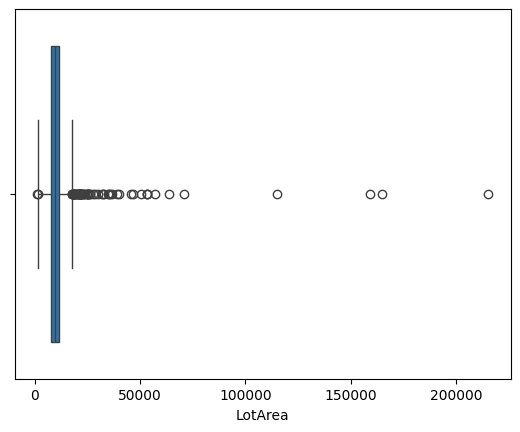

In [ ]:
sns.boxplot(data=training_data,x='LotArea')
plt.show()

In [ ]:
#From the plot we can tell than lot area mostly goeas upto around 50,000 thus we can consider the rest as outliers 
#filter out to get a good glimpse using a histogram

print(len(training_data))
#Thus not too much data is being lost only about 11 rows..woow

print(np.quantile(training_data['LotArea'],0.1))
print(np.quantile(training_data['LotArea'],1))
print(np.quantile(training_data['LotArea'],0.01))
print(np.quantile(training_data['LotArea'],0.001))
#so much of good evidence and now back to training data


1460
5000.0
215245
1680.0
1483.426


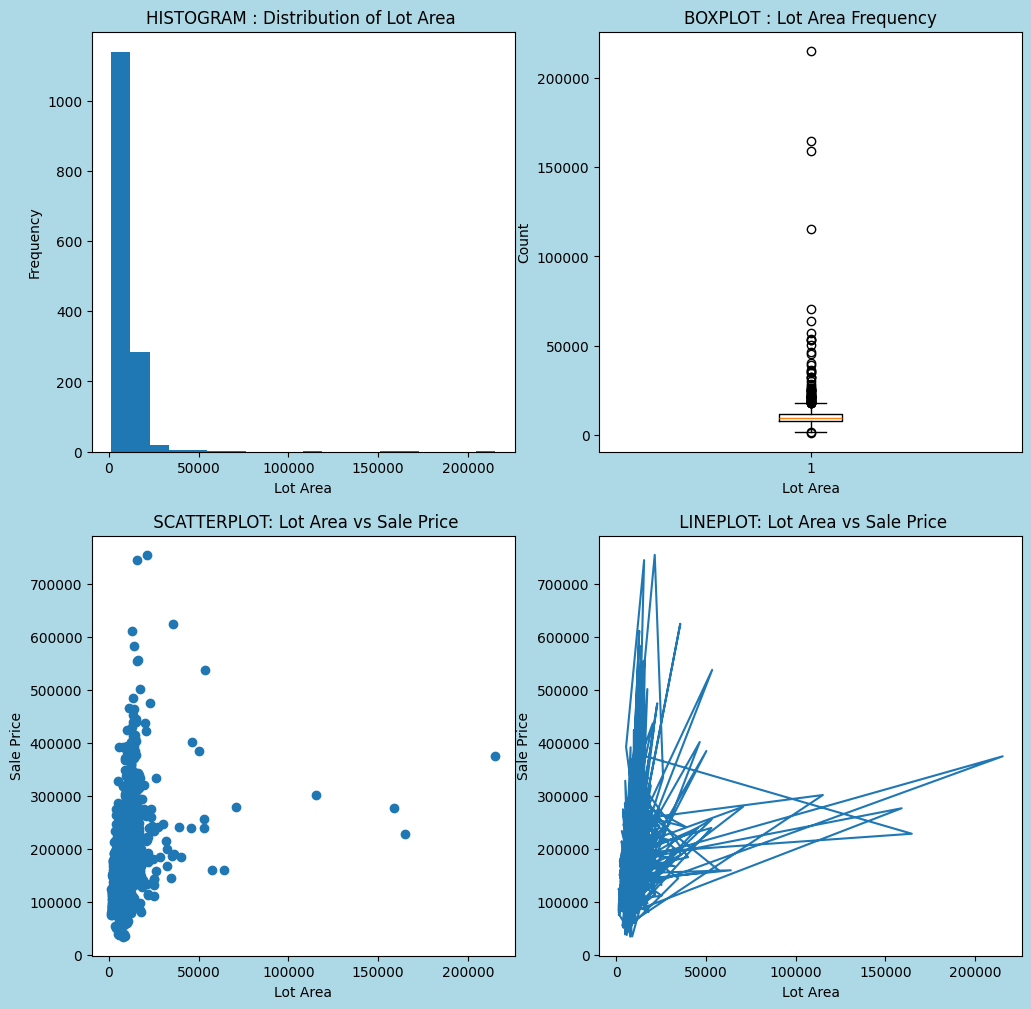

In [ ]:
#Consider according to the problem statement lot area is one of themost important coz its giving us area of some part of theproperty which is to be used for regression purposes
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,12))
fig.patch.set_facecolor('lightblue')
ax[0,0].set_facecolor('white')
ax[0,0].hist(training_data["LotArea"], bins=20)
ax[0,0].set_xlabel("Lot Area")
ax[0,0].set_ylabel("Frequency")
ax[0,0].grid()
ax[0,0].set_title("HISTOGRAM : Distribution of Lot Area ")


#boxplot
ax[0,1].set_facecolor("white")
ax[0,1].boxplot(training_data["LotArea"])
ax[0,1].set_ylabel('Count')
ax[0,1].set_xlabel("Lot Area")
ax[0,1].set_title("BOXPLOT : Lot Area Frequency")
ax[0,0].grid()


#now use as scatter
ax[1,0].set_facecolor("white")
ax[1,0].scatter(training_data["LotArea"],training_data["SalePrice"])
ax[1,0].set_ylabel("Sale Price")
ax[1,0].set_xlabel("Lot Area")
ax[1,0].set_title(" SCATTERPLOT: Lot Area vs Sale Price")
ax[0,0].grid()


#now use as scatter
ax[1,1].set_facecolor("white")
ax[1,1].plot(training_data["LotArea"],training_data["SalePrice"])
ax[1,1].set_ylabel("Sale Price")
ax[1,1].set_xlabel("Lot Area")
ax[1,1].set_title(" LINEPLOT: Lot Area vs Sale Price")
ax[0,0].grid()


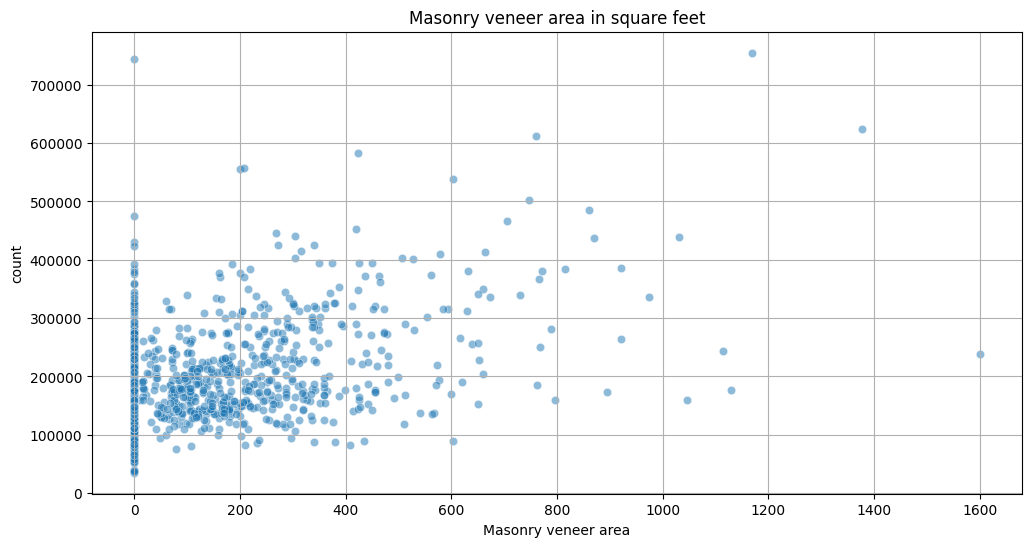

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=training_data,x='MasVnrArea',y='SalePrice',alpha=0.5   )
plt.grid()
plt.xlabel("Masonry veneer area")
plt.ylabel("count")
plt.title("Masonry veneer area in square feet")
plt.show()

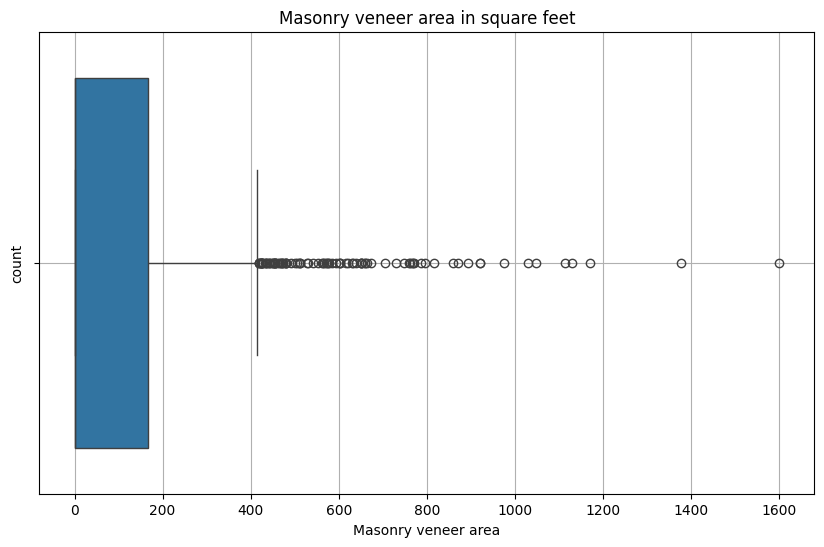

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data,x='MasVnrArea')
plt.grid()
plt.xlabel("Masonry veneer area")
plt.ylabel("count")
plt.title("Masonry veneer area in square feet")
plt.show()

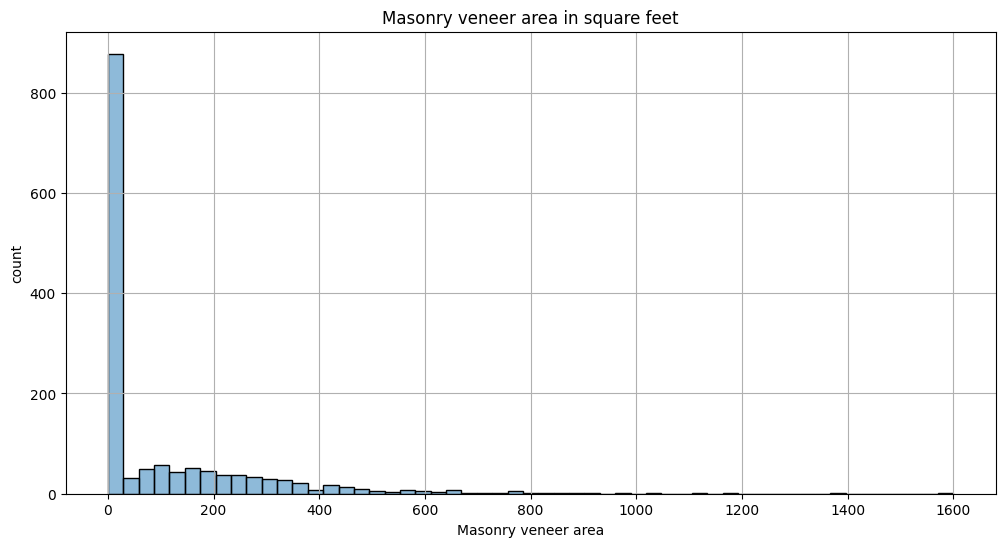

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=training_data,x='MasVnrArea',alpha=0.5)
plt.grid()
plt.xlabel("Masonry veneer area")
plt.ylabel("count")
plt.title("Masonry veneer area in square feet")
plt.show()

In [ ]:
#From the output it is very evident that most have a venner are of 0 sq meters and upto a regular range of 400
#check the number which has
print(len(training_data.loc[training_data['MasVnrArea']==0]))

#It is very important to note that as evidently shown in cells above there are 859 instances where MasVnrArea is 0 and at the same time the MasVnrType is null thus this should explain and thus i find it necessary to dependent
#Reason is
training_data=training_data.drop(columns=['MasVnrArea'])

861


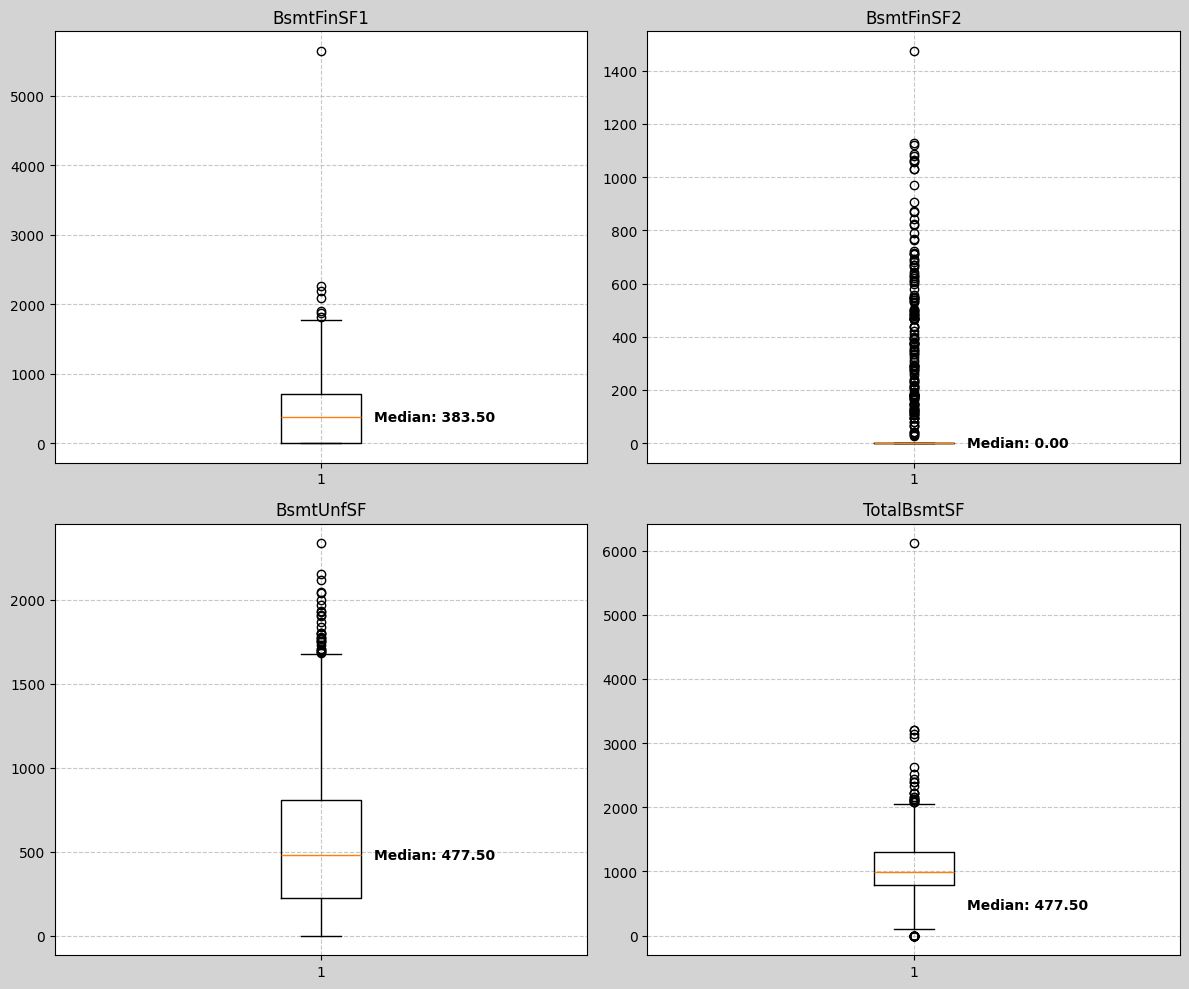

In [ ]:
#Deal with the basementpart
#BsmtFinSF1	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF

#for each create a boxplot
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
# Set the figure facecolor (background color)
fig.patch.set_facecolor('lightgray')





ax[0,0].boxplot(training_data["BsmtFinSF1"])
ax[0,0].set_title("BsmtFinSF1")
# Add a grid
ax[0,0].grid(True, linestyle='--', alpha=0.7)
# Set the axes facecolor
ax[0,0].set_facecolor('white')
# Get the median value
median1 = np.median(training_data['BsmtFinSF1'])
# Annotate the median point
ax[0,0].text(1.1, median1, f'Median: {median1:.2f}', 
            verticalalignment='center', fontweight='bold')

ax[0,1].boxplot(training_data["BsmtFinSF2"])
ax[0,1].set_title("BsmtFinSF2")
# Add a grid
ax[0,1].grid(True, linestyle='--', alpha=0.7)
# Set the axes facecolor
ax[0,1].set_facecolor('white')
median2 = np.median(training_data['BsmtFinSF2'])
# Annotate the median point
ax[0,1].text(1.1, median2, f'Median: {median2:.2f}', 
            verticalalignment='center', fontweight='bold')


ax[1,0].boxplot(training_data["BsmtUnfSF"])
ax[1,0].set_title("BsmtUnfSF")
# Add a grid
ax[1,0].grid(True, linestyle='--', alpha=0.7)
# Set the axes facecolor
ax[1,0].set_facecolor('white')
median3 = np.median(training_data['BsmtUnfSF'])
# Annotate the median point
ax[1,0].text(1.1, median3, f'Median: {median3:.2f}', 
            verticalalignment='center', fontweight='bold')


ax[1,1].boxplot(training_data["TotalBsmtSF"])
ax[1,1].set_title("TotalBsmtSF")
# Add a grid
ax[1,1].grid(True, linestyle='--', alpha=0.7)
# Set the axes facecolor
ax[1,1].set_facecolor('white')
median4 = np.median(training_data['BsmtUnfSF'])
# Annotate the median point
ax[1,1].text(1.1, median4, f'Median: {median4:.2f}', 
            verticalalignment='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
#Note that the purposes of each column here ,plus some more dependant info:
#BsmtFinType1: Rating of basement finished area
#BsmtFinSF1: Type 1 finished square feet

#BsmtFinType2: Rating of basement finished area (if multiple types)
#BsmtFinSF2: Type 2 finished square feet

#BsmtUnfSF: Unfinished square feet of basement area
#TotalBsmtSF: Total square feet of basement area

In [ ]:
#first category:BsmtFinType1 and BsmtFinSF1
print(training_data[['BsmtFinType1','BsmtFinSF1']].head())

check=training_data.loc[training_data['BsmtFinType1'] == 'Unf'][['BsmtFinType1','BsmtFinSF1','BsmtUnfSF']] 
print(check['BsmtFinSF1'].value_counts(dropna=False))#Ensure everything is o

# #When it comes to these three columns then we can conclude that the data has no mix up and it is quite well defined but we must all agree there are outliers
# #Note having a zero in this case is vetr correct as long as the unfinished part aerea is covered in the column
print(np.quantile(training_data['BsmtFinSF1'],0))
print(np.quantile(training_data['BsmtFinSF1'],1))

print(training_data.loc[training_data['BsmtFinSF1']==0]['BsmtFinType1'].value_counts(dropna=False))
training_data=training_data.reset_index(drop=True)
training_data['BsmtFinType1']=training_data['BsmtFinType1'].fillna("None")
print(training_data['BsmtFinType1'].isnull().sum())


#finally
training_data.loc[training_data['BsmtUnfSF']==0]


  BsmtFinType1  BsmtFinSF1
0          GLQ         706
1          ALQ         978
2          GLQ         486
3          ALQ         216
4          GLQ         655
BsmtFinSF1
0    430
Name: count, dtype: int64
0
5644
BsmtFinType1
Unf     430
None     37
LwQ       0
Rec       0
BLQ       0
ALQ       0
GLQ       0
Name: count, dtype: int64
0


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,10791,Pave,Reg,AllPub,Inside,Gtl,Sawyer,Norm,Norm,NaN,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,None,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,None,None,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,6040,Pave,Reg,AllPub,Inside,Gtl,Edwards,Norm,Norm,NaN,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,TA,TA,PConc,None,None,None,None,0,None,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,None,NaN,NaN,None,0,0,None,None,N,0,0,0,0,0,0,None,None,None,0,6,2008,WD,AdjLand,82000
42,43,85,RL,9180,Pave,IR1,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,None,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,None,MnPrv,None,0,12,2007,WD,Normal,144000
52,53,90,RM,8472,Grvl,IR2,AllPub,Corner,Mod,IDOTRR,RRNn,Norm,NaN,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,Fa,TA,CBlock,Gd,TA,Gd,LwQ,104,GLQ,712,0,816,GasA,TA,N,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,None,CarPort,1963.0,Unf,2,516,TA,TA,Y,106,0,0,0,0,0,None,None,None,0,5,2010,WD,Normal,110000
54,55,80,RL,7134,Pave,Reg,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,SLvl,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,TA,No,ALQ,384,Unf,0,0,384,GasA,TA,Y,SBrkr,1360,0,0,1360,0,0,1,0,3,1,TA,6,Min1,1,TA,Detchd,1962.0,Unf,2,572,TA,TA,Y,0,50,0,0,0,0,None,MnPrv,None,0,2,2007,WD,Normal,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,1413,90,RL,7200,Pave,Reg,AllPub,Inside,Gtl,NAmes,Norm,Norm,NaN,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,TA,TA,Slab,None,None,None,None,0,None,0,0,0,Wall,Fa,N,FuseF,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,None,Detchd,1956.0,Unf,2,420,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal,90000
1431,1432,120,RL,4928,Pave,IR1,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,None,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,None,None,None,0,10,2009,WD,Normal,143750
1445,1446,85,RL,8400,Pave,Reg,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,None,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,None,None,None,0,5,2007,WD,Normal,129000
1452,1453,180,RM,3675,Pave,Reg,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,None,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,None,None,None,0,5,2006,WD,Normal,145000


In [ ]:
print(len(training_data))
118+818+430+37

1460


1403

In [ ]:
print(training_data.loc[training_data['BsmtFinSF1']==0]['BsmtFinType1'].value_counts(dropna=False))

#Check whether for every value zero in the BsmtFinSF1' then BsmtUnfSF is greater than 0
print(len(training_data.loc[(training_data['BsmtFinSF1']==0) & (training_data['BsmtUnfSF']>0)]))
#output is 430 so we cool

print(len(training_data.loc[(training_data['BsmtFinSF1']==0) & (training_data['BsmtUnfSF']==0)]))
#37 coz 37 rows have none value for type 1 i.e there is no basement

#check for unfully completed basement of type1
print(len(training_data.loc[(training_data['BsmtFinSF1']>0) & (training_data['BsmtUnfSF']>0)]))

#ensuring there's no type unf for fully completed
training_data.loc[(training_data['BsmtFinSF1']>0) & (training_data['BsmtUnfSF']==0)]['BsmtFinType1'].value_counts(dropna=False)



BsmtFinType1
Unf     430
None     37
LwQ       0
Rec       0
BLQ       0
ALQ       0
GLQ       0
Name: count, dtype: int64
430
37
912


BsmtFinType1
GLQ     25
LwQ     19
ALQ     17
Rec     13
BLQ      7
None     0
Unf      0
Name: count, dtype: int64

In [ ]:
print(len(training_data.loc[(training_data['BsmtFinType1']=="Unf") & (training_data['BsmtFinType2'] == 'Unf')]))
#if then there are no ties then the total of values for values which are not zero in BsmtUnfSF is 430+818=1248

print(len(training_data.loc[training_data['BsmtUnfSF']==0]))
#it is 81
print(len(training_data.loc[training_data['BsmtUnfSF']!=0]))


430
118
1342


In [ ]:
training_data['BsmtFinType2']=training_data['BsmtFinType2'].fillna("None")

In [ ]:
#second category BsmtFinType2 BsmtFinS2 and BsmtUnfSf
check=training_data[['BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]
check['BsmtFinSF2'].value_counts(dropna=False)
check.loc[check['BsmtFinSF2']==0]['BsmtFinType2'].value_counts(dropna=False)

BsmtFinType2
Unf     1256
None      37
LwQ        0
Rec        0
BLQ        0
ALQ        0
GLQ        0
Name: count, dtype: int64

In [ ]:
print(len(training_data.loc[training_data['BsmtFinType1']=="None"]))
print(len(training_data.loc[training_data['BsmtFinType2']=="None"]))

37
38


In [ ]:
#I believe that the totalTotalBsmtSF is given by sum of everything
#From the output it is evident that the statement above is true
(training_data['BsmtFinSF1']+training_data['BsmtFinSF2']+training_data['BsmtUnfSF']==training_data['TotalBsmtSF']).value_counts()

#Therefore we can drop all the three columns and remain with just one this is to continue fitting me to work towards the problem statement
training_data=training_data.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'])

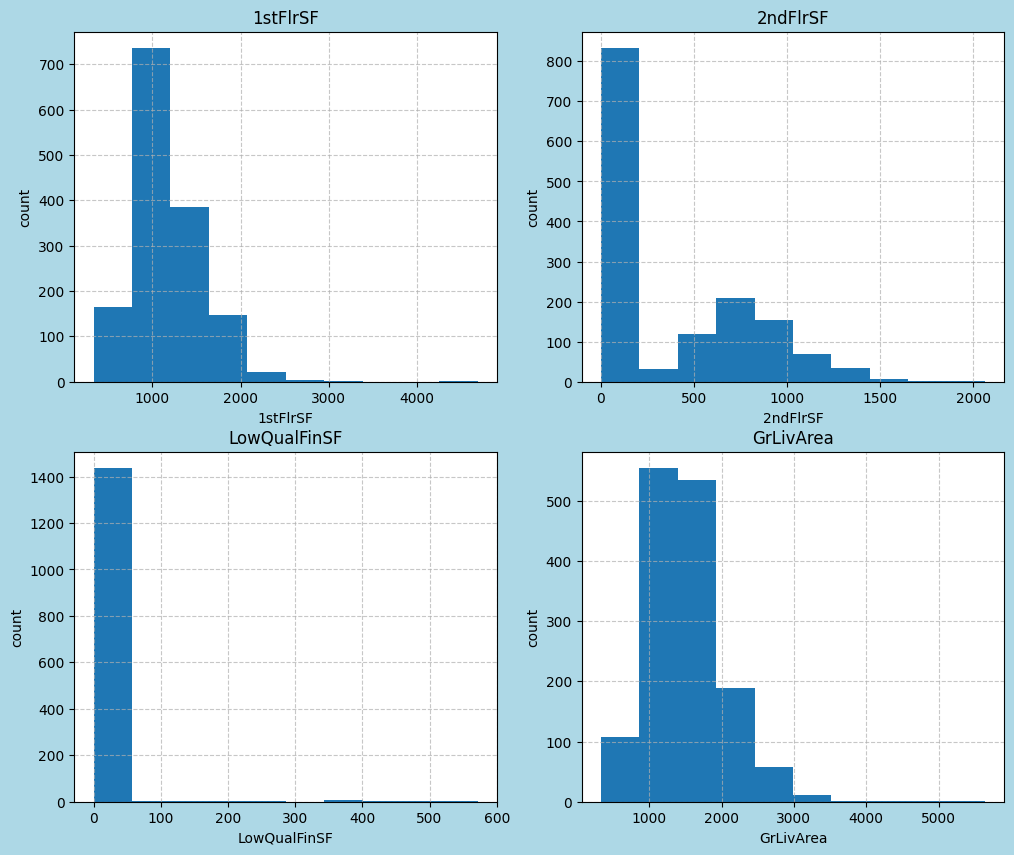

In [ ]:
#fig
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
fig.patch.set_facecolor('lightblue')

col_list=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']
ax_list=[ ax[0,0], ax  [0,1], ax[1,0], ax[1,1] ]
for ax,col in zip(ax_list,col_list):
    ax.hist(training_data[col])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("count")
    # Add a grid
    ax.grid(True, linestyle='--', alpha=0.7)
    # Set the axes facecolor
    ax.set_facecolor('white')


In [ ]:
#No house can lack atleast one floor i.e ground floor let's ensure that
print(len(training_data.loc[training_data['1stFlrSF']==0]))
print(len(training_data.loc[training_data['GrLivArea']==0]))
#output is 0 thus valid


0
0


In [ ]:
print(training_data['TotRmsAbvGrd'].head())
training_data['BedroomAbvGr'].head()

0    8
1    6
2    6
3    7
4    9
Name: TotRmsAbvGrd, dtype: int64


0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64

In [ ]:
#remember the TotRmsAbvGrd do not include bathrooms
tots=training_data['BedroomAbvGr'] + training_data['KitchenAbvGr']

(training_data['TotRmsAbvGrd']==tots).value_counts(dropna=False)
#So it may not be equal but for sure totalrroms must be greater than tots
(training_data['TotRmsAbvGrd']>=tots).value_counts()

True    1460
Name: count, dtype: int64

In [ ]:
training_data.loc[training_data['TotRmsAbvGrd'] < tots][['TotRmsAbvGrd','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr']]

#output is zero thus making sense

,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr


In [ ]:
training_data.loc[(training_data['1stFlrSF'])==(training_data['GrLivArea'])][['1stFlrSF','GrLivArea','2ndFlrSF']].head()

,1stFlrSF,GrLivArea,2ndFlrSF
1,1262,1262,0
6,1694,1694,0
9,1077,1077,0
10,1040,1040,0
12,912,912,0


In [ ]:
training_data['FloorsArea']=training_data['1stFlrSF']+training_data['2ndFlrSF']+training_data['GrLivArea']+training_data['LowQualFinSF']
training_data[['1stFlrSF','2ndFlrSF','GrLivArea','FloorsArea']].head()
training_data=training_data.drop(columns=['1stFlrSF','2ndFlrSF','GrLivArea','LowQualFinSF'])

In [ ]:
training_data[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].head()
training_data['TotPorchArea']=training_data['EnclosedPorch']+training_data['3SsnPorch']+training_data['OpenPorchSF']+training_data['ScreenPorch']
training_data=training_data.drop(columns=['EnclosedPorch','3SsnPorch','ScreenPorch','OpenPorchSF'])

- So far the numerical columns show much efficiency and realistic insights .
- According to the problem statement we need to consider area columns very much as they are on of the key in the linear regression model:
  - LotArea: Lot size in square feet
  - MasVnrArea: Masonry veneer area in square feet
  - TotalBsmtSF: Total square feet of basement area
     - BsmtFinSF1: Type 1 finished square feet--dropped
     - BsmtFinSF2: Type 2 finished square feet--dropped
     - BsmtUnfSF: Unfinished square feet of basement area--dropped
  - floorsArea: all floors area    
     - 1stFlrSF: First Floor square feet--dropped
     - 2ndFlrSF: Second floor square feet--dropped
     - GrLivArea: Above grade (ground) living area square feet--dropped
     - LowQualFinSF: Low quality finished square feet (all floors)--dropped
  - GarageArea: Size of garage in square feet
  - WoodDeckSF: Wood deck area in square feet
  -TotPorchArea: Total Porch area
     - OpenPorchSF: Open porch area in square feet
     - EnclosedPorch: Enclosed porch area in square feet
     - 3SsnPorch: Three season porch area in square feet
     - ScreenPorch: Screen porch area in square feet
  - PoolArea: Pool area in square feet

In [ ]:
#Number of bedrooms and bathroms
training_data['TotalBath']=training_data['BsmtFullBath']+training_data['BsmtHalfBath']+training_data['FullBath']+training_data['HalfBath']
training_data[['TotalBath','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].head()
training_data=training_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'])

In [ ]:
#Number of bedrooms 
training_data['TotalBedRms']=training_data['BedroomAbvGr'] 

## MODELLING


In [ ]:
data=training_data[['TotalBedRms','TotalBath','LotArea','TotalBsmtSF','FloorsArea','GarageArea','WoodDeckSF','TotPorchArea','PoolArea','SalePrice']]
data.corr()


,TotalBedRms,TotalBath,LotArea,TotalBsmtSF,FloorsArea,GarageArea,WoodDeckSF,TotPorchArea,PoolArea,SalePrice
TotalBedRms,1.000000,0.267732,0.119690,0.050450,0.521270,0.065253,0.046854,0.099901,0.070703,0.168213
TotalBath,0.267732,1.000000,0.184407,0.339473,0.617494,0.425791,0.279980,0.135674,0.085027,0.613005
LotArea,0.119690,0.184407,1.000000,0.260833,0.263116,0.180403,0.171698,0.071310,0.077672,0.263843
TotalBsmtSF,0.050450,0.339473,0.260833,1.000000,0.454868,0.486665,0.232019,0.155471,0.126053,0.613581
FloorsArea,0.521270,0.617494,0.263116,0.454868,1.000000,0.468997,0.247433,0.272853,0.170205,0.708624
GarageArea,0.065253,0.425791,0.180403,0.486665,0.468997,1.000000,0.224666,0.118346,0.061047,0.623431
WoodDeckSF,0.046854,0.279980,0.171698,0.232019,0.247433,0.224666,1.000000,-0.084709,0.073378,0.324413
TotPorchArea,0.099901,0.135674,0.071310,0.155471,0.272853,0.118346,-0.084709,1.000000,0.094734,0.195739
PoolArea,0.070703,0.085027,0.077672,0.126053,0.170205,0.061047,0.073378,0.094734,1.000000,0.092404
SalePrice,0.168213,0.613005,0.263843,0.613581,0.708624,0.623431,0.324413,0.195739,0.092404,1.000000


In [ ]:
x=training_data[['TotalBedRms','TotalBath','LotArea','TotalBsmtSF','FloorsArea','GarageArea','WoodDeckSF','TotPorchArea','PoolArea']]
y=training_data['SalePrice']


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:

x_test=test_data[['TotalBedRms','TotalBath','LotArea','TotalBsmtSF','FloorsArea','GarageArea','WoodDeckSF','TotPorchArea','PoolArea']]
y_test=test_data['SalePrice']

KeyError: "['TotalBedRms', 'TotalBath', 'FloorsArea', 'TotPorchArea'] not in index"

In [ ]:
x.isnull().sum()

TotalBedRms     0
TotalBath       0
LotArea         0
TotalBsmtSF     0
FloorsArea      0
GarageArea      0
WoodDeckSF      0
TotPorchArea    0
PoolArea        0
dtype: int64

In [ ]:
print(type(y))
y=np.array(y)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#scale data
ss=StandardScaler()
x=ss.fit_transform(x)
data=np.hstack((x,(y.reshape(-1,1))))
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.163779,1.701318,-0.207142,-0.459303,0.370333,0.351000,-0.752176,-0.248063,-0.068692,208500.0
1,0.163779,0.617108,-0.091886,0.466465,-0.482512,-0.060731,1.626195,-0.828163,-0.068692,181500.0
2,0.163779,1.701318,0.073480,-0.313369,0.515013,0.631726,-0.752176,-0.428750,-0.068692,223500.0
3,0.163779,-0.467101,-0.096897,-0.687324,0.383659,0.790804,-0.752176,2.091355,-0.068692,140000.0
4,1.390023,1.701318,0.375148,0.199680,1.299326,1.698485,0.780197,-0.029337,-0.068692,250000.0


- Linear Regresion follows y=a1x1+a2x2+.......+anxn +b i.e Multiple Linear Regression where:
  - y is the target variable
  - x1,....xn are the various independent variables forming the feature matrix
  - a1...an are the co-efficients of each independent variable
  - b id the intercept with the y axis
- So mechanism of the model is basically fitting a line to the data by choosing values of a and b
- This is done by defining an error function for any line given and then choose the line that minimizes this error function
- The fitted line should be as close to the observetions(visualized in a scatter plot) as possible,therefore ,we want to minimize the distance between the fitted line(lr) and the data.
- The distance between the fit and data point is called residual and each positive residual cancels out the negative residual so to avoid this we square the residuals 
- We then add all squared residulas to get **Residual Sum of Squares** 
- This linear regression is called Ordinary Least Sqares where we aim at reducing the RSS.

- We are also going to implement crossValidation but it's good to note that the more the folds the more it is computationally expensive 
- Also we are going to use hyperparameter tuning using RandomizedSearchCv



- Regularized regression invlves the reguarization technique which is used to avoid overfitting 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
param_grid={
   'ridge__alpha':np.logspace(-3,3,10),
   'ridge__solver':['auto'],
   'ridge__fit_intercept':[True,False]
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
     ('ridge',Ridge())])


kf=KFold(n_splits=6,shuffle=True,random_state=23)

r_cv=GridSearchCV(pipeline,param_grid,scoring='neg_mean_squared_error',cv=kf)
r_cv.fit(x,y)


best_ridge_model = r_cv.best_estimator_
best_parameters= r_cv.best_params_
best_alpha=best_parameters['ridge__alpha']

#Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'].

In [ ]:
print("Best Ridge model ",best_ridge_model)
print("Best parameters ",best_parameters)
print("Best alpha ",best_alpha)
print(f"Best cross-validated MSE: {-r_cv.best_score_}")


Best Ridge model  Ridge(alpha=215.44346900318823)
Best parameters  {'alpha': 215.44346900318823, 'fit_intercept': True, 'solver': 'auto'}
Best alpha  215.44346900318823
Best cross-validated MSE: 2110223059.9430807


In [ ]:
#Now we got the best parameters
r_model=Ridge(alpha=215.44346900318823,fit_intercept=True,solver='auto',max_iter=1000)
r_model.fit(x,y)
print("R^2 Score:", r_model.score(x, y))


R^2 Score: 0.7014569618991345


In [ ]:
print(r_model.coef_)

[-6821.57633108 15523.78426093  2462.93236745 18172.21117976
 27570.6758504  17166.70564566  5868.80121057  1964.99751221
 -2038.06172662]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
names=['True Positive','True Negative','False Positive','False Negative']
counts=['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages=['{0:0.0f}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f'{v2}\n{v2}\n{v3}' for v1,v2,v3 in zip(names,counts,percentages)]
labels=np.asarray(labels).reshape(2,2)
ticklabels=['spam','Non_spam']
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=labels,fmt='',cmap='Blues',xticklabels=ticklabels,yticklabels=ticklabels)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix")
plt.xlabel("Predicted",size=11)
plt.ylabel("Actual",size=11)
plt.show()

NameError: name 'y_test' is not defined